# INTRADAY OPTION VALUES AND GREEKS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.equity import EquityVanillaOption
from financepy.market.curves import DiscountCurveFlat
from financepy.models.black_scholes import *

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
set_date_format(DateFormatTypes.DATETIME)

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

Option expires at 11am

In [4]:
expiry_dt = Date(5, 1, 2021, 11, 0, 0)

In [5]:
strike_price = 100.0

We now create the option object

In [6]:
call_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_CALL)

## Valuation Dates

In [7]:
start_dt = Date(1, 1, 2021)

In [8]:
expiry_dt - start_dt

4.458333333335759

In [9]:
hoursToExpiry = int((expiry_dt - start_dt) * 24)

In [10]:
hoursToExpiry

107

In [11]:
value_dts = []
times = []

nextValuationDate = start_dt

for i in range(0, hoursToExpiry):
    nextValuationDate = nextValuationDate.add_hours(1)
    value_dts.append(nextValuationDate)
    time = (nextValuationDate - start_dt) * 24
    times.append(time)

## Valuations

To do a valuation we need to specify the date and set the market inputs

In [12]:
stock_price = 98.0
dividend_yield = 0.02
interest_rate = 0.05

In [13]:
volatility = 0.20
model = BlackScholes(volatility)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

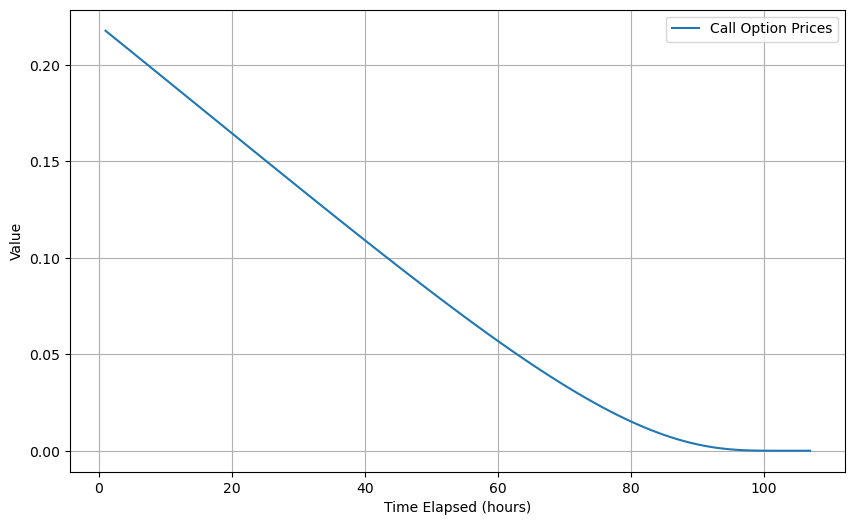

In [14]:
values = []
intTimes = []

for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    call_value = call_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)
    t = call_option.t_exp
    intTimes.append(t)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Prices")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Risk Sensitivities

## Delta

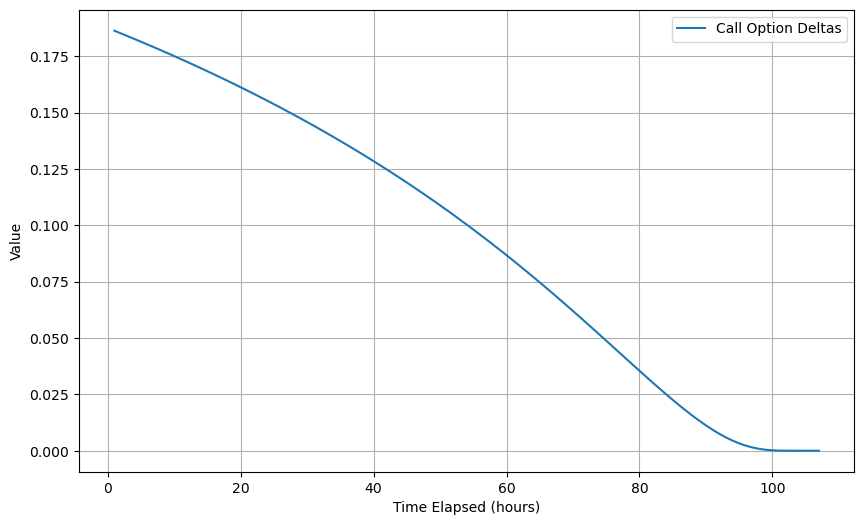

In [15]:
values = []

for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    delta = call_option.delta(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(delta)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Deltas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Gamma

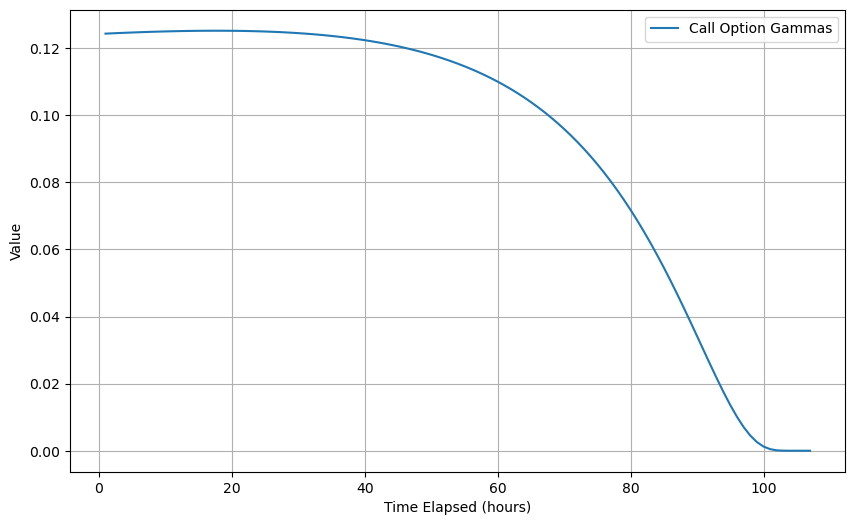

In [16]:
values = []
for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    call_value = call_option.gamma(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Gammas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Vega

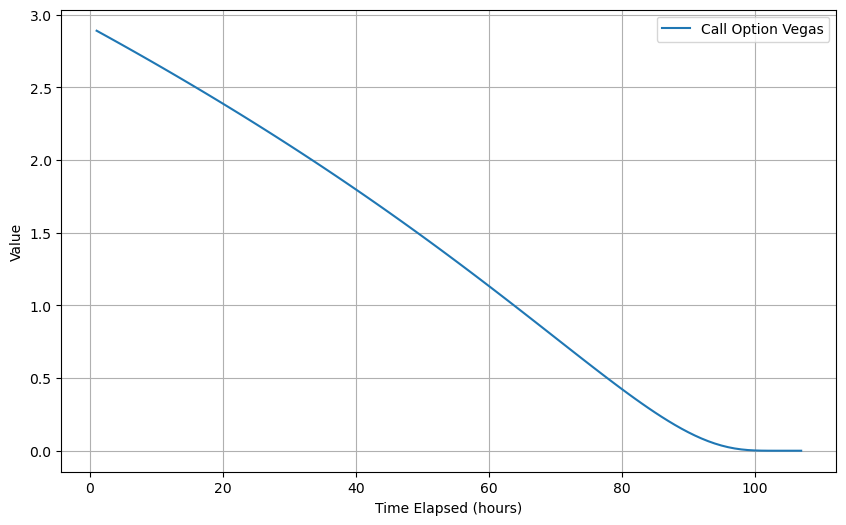

In [17]:
values = []
for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    call_value = call_option.vega(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Vegas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Theta

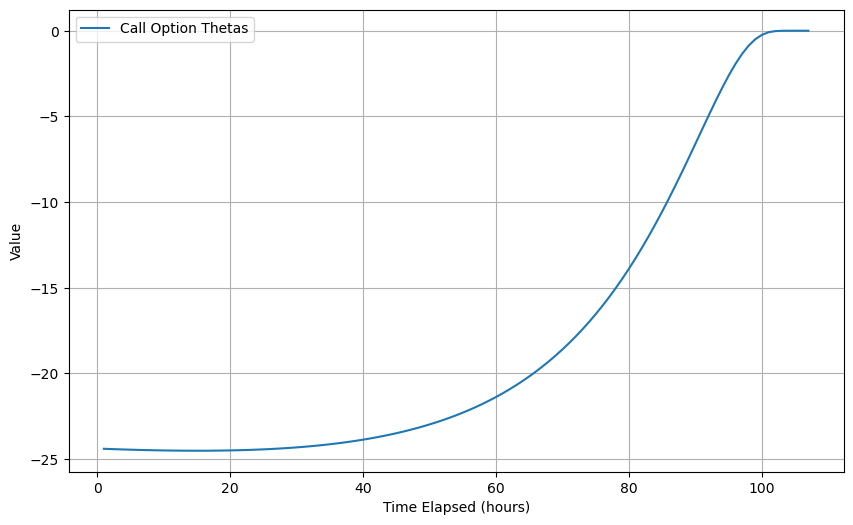

In [18]:
values = []
for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    call_value = call_option.theta(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Thetas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Rho

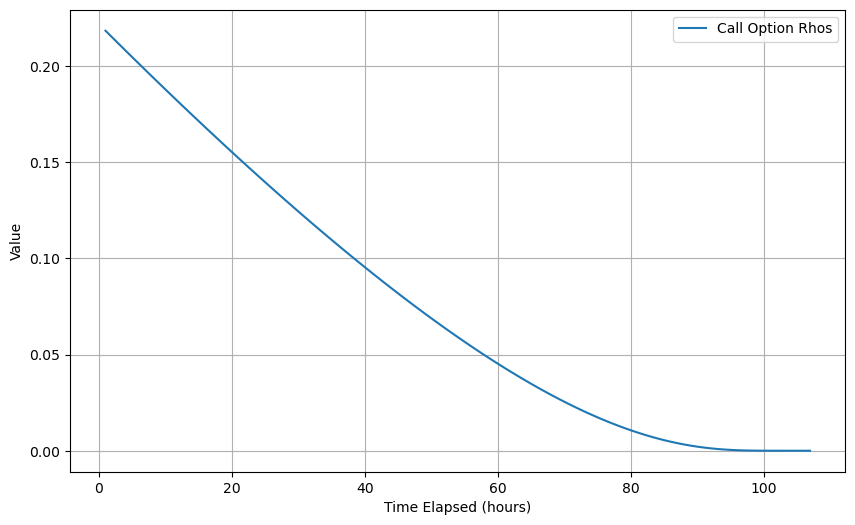

In [19]:
values = []
for value_dt in value_dts:
    discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.ANNUAL)
    dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)
    call_value = call_option.rho(value_dt, stock_price, discount_curve, dividend_curve, model)
    values.append(call_value)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Rhos")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 